# Exploratory analysis

A short notebook exploring the supplied weather data CSVs that attempts to:
* understand the data provided 
* check for common pitfalls
* answer the questions set out in the data engineering test to be used for reference later

In [1]:
import pandas as pd, matplotlib

In [2]:
weather_1 = pd.read_csv("weather.20160201.csv")
weather_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93255 entries, 0 to 93254
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ForecastSiteCode        93255 non-null  int64  
 1   ObservationTime         93255 non-null  int64  
 2   ObservationDate         93255 non-null  object 
 3   WindDirection           93255 non-null  int64  
 4   WindSpeed               93255 non-null  int64  
 5   WindGust                27093 non-null  float64
 6   Visibility              80542 non-null  float64
 7   ScreenTemperature       93255 non-null  float64
 8   Pressure                86556 non-null  float64
 9   SignificantWeatherCode  93255 non-null  int64  
 10  SiteName                93255 non-null  object 
 11  Latitude                93255 non-null  float64
 12  Longitude               93255 non-null  float64
 13  Region                  93255 non-null  object 
 14  Country                 80154 non-null

In [3]:
weather_2 = pd.read_csv("weather.20160301.csv")
weather_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101442 entries, 0 to 101441
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ForecastSiteCode        101442 non-null  int64  
 1   ObservationTime         101442 non-null  int64  
 2   ObservationDate         101442 non-null  object 
 3   WindDirection           101442 non-null  int64  
 4   WindSpeed               101442 non-null  int64  
 5   WindGust                16193 non-null   float64
 6   Visibility              87662 non-null   float64
 7   ScreenTemperature       101442 non-null  float64
 8   Pressure                93321 non-null   float64
 9   SignificantWeatherCode  101442 non-null  int64  
 10  SiteName                101442 non-null  object 
 11  Latitude                101442 non-null  float64
 12  Longitude               101442 non-null  float64
 13  Region                  101442 non-null  object 
 14  Country             

In [4]:
#check that columns are the same
weather_1.shape[1] == len(weather_1.columns.intersection(weather_2.columns))

True

In [5]:
#check for there are no null values in the temperature column
not weather_1.ScreenTemperature.isnull().any() and not weather_1.ScreenTemperature.isnull().any()

True

In [6]:
#combine both data sets
weather_total = pd.concat([weather_1, weather_2]).reset_index()

In [7]:
#check for errors by checking that the combinedd dataframe has correct number of rows 
# e.g. differnt Dtypes for the same column name would result in duplicate rows
len(weather_total.index) == len(weather_1.index) + len(weather_2.index)

True

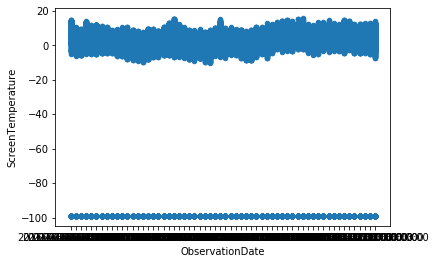

In [8]:
# visualise temperature readings
weather_total.plot.scatter(x='ObservationDate', y='ScreenTemperature')

## Answer to question set in test

In [9]:
#query dataframe to answer questions set in data engineering test for later reference
weather_total.loc[weather_total[['ScreenTemperature']].idxmax(), ['ObservationDate','ScreenTemperature','Region']]

,ObservationDate,ScreenTemperature,Region
147768,2016-03-17T00:00:00,15.8,Highland & Eilean Siar


In [10]:
weather_total.to_parquet(path='pandas_parquet.parquet', compression='gzip')

In [11]:
# investigate cold readings
weather_total['ColdReading'] = weather_total.ScreenTemperature.apply(lambda x: True if x<-80 else False)
cold_df = weather_total[['Region', 'ColdReading','ScreenTemperature']].groupby(
    ['Region', "ColdReading"]).agg(
    {'ScreenTemperature':'count'})

cold_df = cold_df.groupby('Region').apply(lambda x:100 * x / float(x.sum())).reset_index()
cold_df = cold_df.pivot(index='Region', columns='ColdReading', values='ScreenTemperature')
pd.options.display.float_format = "{:,.2f}".format
cold_df


ColdReading,False,True
Region,,
Central Tayside & Fife,99.98,0.02
"Dumfries, Galloway",99.94,0.06
East Midlands,99.95,0.05
East of England,99.93,0.07
Grampian,99.84,0.16
Highland & Eilean Siar,99.90,0.10
London & South East England,99.96,0.04
North East England,99.98,0.02
North West England,92.97,7.03
